In [1]:
#  comppute portfolio simple returns,daily returns and volatility

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import  matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# get stock symbols for portfolio
stockSymbols = ['FB','AMZN','AAPL','NFLX','GOOG']

In [4]:
stockStartDate = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2022-03-18


In [5]:
numAssets = len(stockSymbols)
print('You have '+str(numAssets)+' assets in your portfolio.')

You have 5 assets in your portfolio.


In [8]:
def getMyPortfolio(stocks= stockSymbols, start=stockStartDate,end=today,col='Adj Close'):
    data=web.DataReader(stocks, data_source='yahoo',start=start,end=end)[col]
    return data

In [9]:
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,26.620001,250.869995,16.418940,13.227143,352.369232
2013-01-02,28.000000,257.309998,16.939114,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.725307,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.259428,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.163786,14.171429,366.003143
...,...,...,...,...,...
2022-03-14,186.630005,2837.060059,150.619995,331.010010,2534.820068
2022-03-15,192.029999,2947.330078,155.089996,343.750000,2593.209961
2022-03-16,203.630005,3062.080078,159.589996,357.529999,2673.810059


In [14]:
def showGraph(stocks= stockSymbols,start=stockStartDate,end=today,col='Adj Close'):
    #create title
    title = 'Portfolio '+col+' Price History'
    
    #get stocks
    my_stocks= getMyPortfolio(stocks=stocks,start=start,end=end,col=col)
    
    plt.figure(figsize=(18,9))
    
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c],label=c)
        
    plt.title(title)
    plt.xlabel('Date',fontsize=18)
    plt.ylabel(col+' Price USD',fontsize=18)
    plt.legend(my_stocks.columns.values,loc='upper left')
    plt.show()

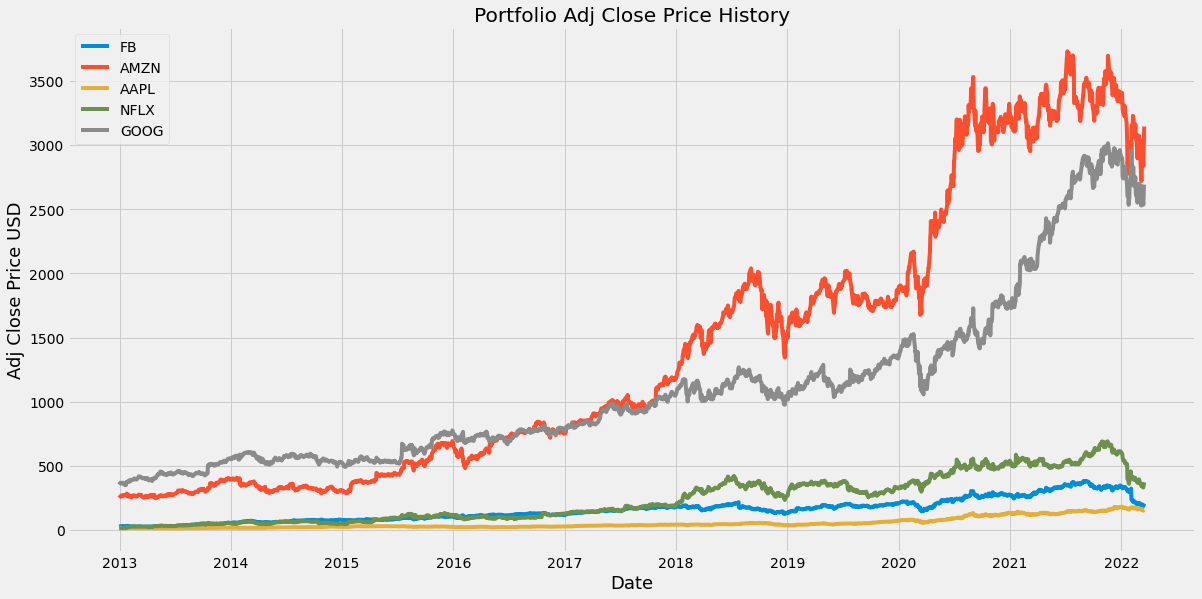

In [15]:
showGraph(stockSymbols)

In [16]:
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.025671,0.031681,-0.006264,0.022435
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
...,...,...,...,...,...
2022-03-14,-0.005224,-0.025229,-0.026562,-0.027357,-0.028622
2022-03-15,0.028934,0.038868,0.029677,0.038488,0.023035
2022-03-16,0.060407,0.038934,0.029015,0.040087,0.031081


In [17]:
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.524011,0.456825,0.370409,0.570689
AMZN,0.524011,1.000000,0.466508,0.457175,0.600546
AAPL,0.456825,0.466508,1.000000,0.282327,0.533999
NFLX,0.370409,0.457175,0.282327,1.000000,0.415363
GOOG,0.570689,0.600546,0.533999,0.415363,1.000000


In [18]:
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000495,0.000225,0.000181,0.000236,0.000206
AMZN,0.000225,0.000373,0.000161,0.000253,0.000189
AAPL,0.000181,0.000161,0.000318,0.000144,0.000155
NFLX,0.000236,0.000253,0.000144,0.000819,0.000193
GOOG,0.000206,0.000189,0.000155,0.000193,0.000264


In [19]:
daily_simple_returns.var()

Symbols
FB      0.000495
AMZN    0.000373
AAPL    0.000318
NFLX    0.000819
GOOG    0.000264
dtype: float64

In [20]:
print('Stock Volatility:')
daily_simple_returns.std()

Stock Volatility:


Symbols
FB      0.022253
AMZN    0.019325
AAPL    0.017829
NFLX    0.028622
GOOG    0.016243
dtype: float64

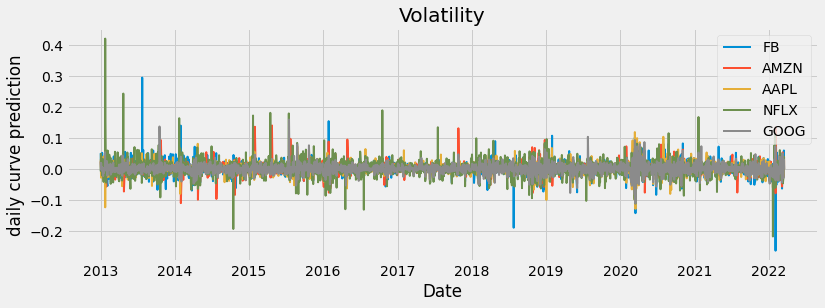

In [23]:
#visualise stock daily simple return
plt.figure(figsize=(12,4))
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index,daily_simple_returns[c],lw=2,label=c)
    
plt.legend()
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('daily curve prediction')
plt.show();

In [24]:
#show mean of daily return
dailyMeanSimpleReturns = daily_simple_returns.mean()
dailyMeanSimpleReturns

Symbols
FB      0.001134
AMZN    0.001276
AAPL    0.001143
NFLX    0.001837
GOOG    0.001008
dtype: float64

In [27]:
#expected portfolio daily return
randomWeights =   np.array([0.4,0.1,0.3,0.1,0.1]) #40% fb,10%amzn,30%aapl,10%nflx,10%goog
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

print('The daily expected portfolio return is:'+ str(portfolioSimpleReturn))

The daily expected portfolio return is:0.0012086677241844005


In [28]:
print('The yearly expected portfolio return is:'+ str(portfolioSimpleReturn* 253))

The yearly expected portfolio return is:0.30579293421865333


In [29]:
#calculate growth of investment
dailyCumulativeSimpleReturn = (daily_simple_returns+1).cumprod()
dailyCumulativeSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,1.051841,1.025671,1.031681,0.993736,1.022435
2013-01-03,1.043201,1.030335,1.018659,1.043201,1.023029
2013-01-04,1.080391,1.033005,0.990285,1.036613,1.043244
2013-01-07,1.105184,1.070116,0.984460,1.071390,1.038692
...,...,...,...,...,...
2022-03-14,7.010894,11.308886,9.173552,25.025057,7.193648
2022-03-15,7.213749,11.748436,9.445799,25.988227,7.359354
2022-03-16,7.649512,12.205844,9.719872,27.030024,7.588092


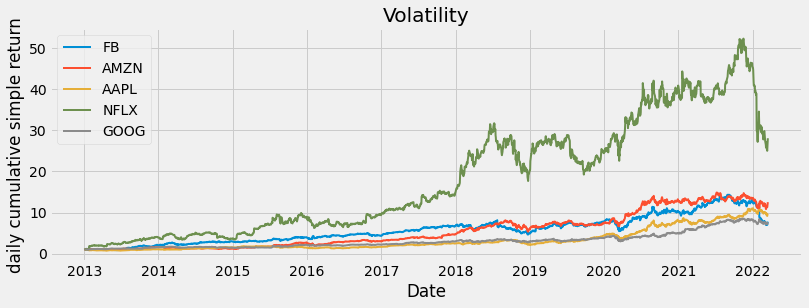

In [31]:
plt.figure(figsize=(12,4))
for c in dailyCumulativeSimpleReturn.columns.values:
    plt.plot(dailyCumulativeSimpleReturn.index,dailyCumulativeSimpleReturn[c],lw=2,label=c)
    
plt.legend()
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('daily cumulative simple return')
plt.show();